In [2]:
#Import necessary packages
import keras
import numpy as np
import math
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM
import matplotlib.pyplot as plt
import pickle as cPickle


# Importing and normalizing data

In [3]:
#Import dataset and normalize to [0,1]
#Has shape (num_samples, 28, 28)
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0
print(data_test.shape)
data_train = data_train.reshape(60000, 28, 28, 1)
data_test = data_test.reshape(10000, 28, 28, 1)
print(data_test.shape)
#Create labels as one-hot vectors
#labels_train and labels_test have shapes (60000, 10) and (10000 10,) respectively
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)


4431872/4422102 [==============================] - 0s 0us/step
(10000, 28, 28)
(10000, 28, 28, 1)


# Dropout on input layer

In [ ]:
num_classes=10
#Create and train model architecture
def CNN_dropout_in():

    #Easiest way to build model in Keras is using Sequential. It allows models to 
    #be built layer by layer as we will do here
    model = Sequential()
    
    # Bild a 2D Convolutional layer with 256 feature maps and a 3x3 filter
    model.add(Conv2D(256 , (3,3), activation = 'sigmoid', input_shape = (28,28,1)))
    
    # Randomly freezes 30% of weights in previous layer to prevent over fitting
    model.add(Dropout(0.3))
    
    # Add a 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides = None, padding = 'valid', data_format = None ))
    
    # Add a 2D Convolutional layer with 
    model.add(Conv2D(128, (3,3), activation = 'sigmoid', input_shape = (13,13,256) ))

    # Add a 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides = None, padding = 'valid', data_format = None ))
    
    # Flatten data for input into Dense layers
    model.add(Flatten())
    
    # Add Dense layer with 100 perceptrons
    model.add(Dense(100, activation = "relu", kernel_initializer = "normal"))
    
    # Add another Dense layer with 100 perceptrons
    model.add(Dense(100, activation = "relu", kernel_initializer = "normal"))

    #Output layer with num_classes perceptrons
    model.add(Dense(num_classes, activation = "softmax"))
    
    return model

#Create instance of CNN model graph
CNN_dropout_in = CNN_dropout_in()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_in.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_dropout_in_mdata = CNN_dropout_in.fit(data_train, labels_train, validation_data = (data_test, labels_test), epochs =100, batch_size = 2048, shuffle = True)

#Print accuracy of model on testing set after training 
scores = CNN_dropout_in.evaluate(data_test, labels_test)

print("Accuracy: %.2f%%" %(scores[1]*100))

Epoch 1/100
30/30 [==============================] - 17s 553ms/step - loss: 2.4138 - accuracy: 0.0970 - val_loss: 2.3149 - val_accuracy: 0.1000
Epoch 2/100
30/30 [==============================] - 16s 547ms/step - loss: 2.3085 - accuracy: 0.0998 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 3/100
30/30 [==============================] - 16s 546ms/step - loss: 2.2825 - accuracy: 0.1340 - val_loss: 2.2252 - val_accuracy: 0.2353
Epoch 4/100
30/30 [==============================] - 16s 545ms/step - loss: 1.8894 - accuracy: 0.3466 - val_loss: 1.4428 - val_accuracy: 0.5513
Epoch 5/100
30/30 [==============================] - 16s 545ms/step - loss: 1.2400 - accuracy: 0.5435 - val_loss: 1.0370 - val_accuracy: 0.6265
Epoch 6/100
30/30 [==============================] - 16s 545ms/step - loss: 1.0342 - accuracy: 0.6133 - val_loss: 1.0419 - val_accuracy: 0.6145
Epoch 7/100
30/30 [==============================] - 16s 545ms/step - loss: 0.9312 - accuracy: 0.6499 - val_loss: 0.9531 - val_accuracy:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


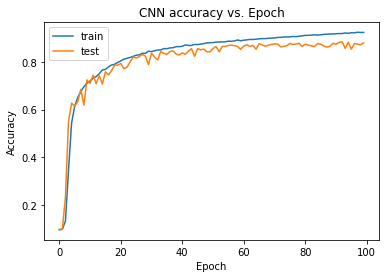

In [ ]:
#Plot accuracy vs epoch

plt.plot(CNN_dropout_in_mdata.history['accuracy'])
plt.plot(CNN_dropout_in_mdata.history['val_accuracy'])
plt.title('CNN accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='bottom right')
plt.show()

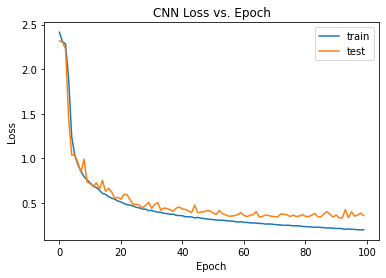

In [ ]:
#Plot loss vs epoch

plt.plot(CNN_dropout_in_mdata.history['loss'])
plt.plot(CNN_dropout_in_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

# Dropout on Hidden Layers

In [ ]:
num_classes=10
#Create and train model architecture
def CNN_dropout_hidden():
    model = Sequential()

    # Bild a 2D Convolutional layer with 256 feature maps and a 3x3 filter
    model.add(Conv2D(256 , (3,3), activation = 'sigmoid', input_shape = (28,28,1)))
    
    # Add a 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides = None, padding = 'valid', data_format = None ))
    
    # Add a 2D Convolutional layer with 
    model.add(Conv2D(128, (3,3), activation = 'sigmoid', input_shape = (13,13,256) ))
    
    # Randomly freezes 30% of weights in previous layer to prevent over fitting
    model.add(Dropout(0.3))

    # Add a 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides = None, padding = 'valid', data_format = None ))
    
    # Flatten data for input into Dense layers
    model.add(Flatten())
    
    # Add Dense layer with 100 perceptrons
    model.add(Dense(100, activation = "relu", kernel_initializer = "normal"))
    
    # Add another Dense layer with 100 perceptrons
    model.add(Dense(100, activation = "relu", kernel_initializer = "normal"))

    #Output layer with num_classes perceptrons
    model.add(Dense(num_classes, activation = "softmax"))
    
    return model

#Create instance of CNN model graph
CNN_dropout_hidden = CNN_dropout_hidden()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_hidden.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_dropout_hidden_mdata = CNN_dropout_hidden.fit(data_train, labels_train, validation_data = (data_test, labels_test), epochs =100, batch_size = 2048, shuffle = True)

#Print accuracy of model on testing set after training 
scores = CNN_dropout_hidden.evaluate(data_test, labels_test)

print("Accuracy: %.2f%%" %(scores[1]*100))

Epoch 1/100
30/30 [==============================] - 14s 423ms/step - loss: 2.4149 - accuracy: 0.1008 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/100
30/30 [==============================] - 13s 419ms/step - loss: 2.2990 - accuracy: 0.1104 - val_loss: 2.2944 - val_accuracy: 0.1002
Epoch 3/100
30/30 [==============================] - 13s 420ms/step - loss: 2.0729 - accuracy: 0.2380 - val_loss: 1.9503 - val_accuracy: 0.2605
Epoch 4/100
30/30 [==============================] - 13s 419ms/step - loss: 1.4028 - accuracy: 0.4746 - val_loss: 1.1780 - val_accuracy: 0.6166
Epoch 5/100
30/30 [==============================] - 12s 416ms/step - loss: 1.0607 - accuracy: 0.5934 - val_loss: 1.1254 - val_accuracy: 0.6364
Epoch 6/100
30/30 [==============================] - 12s 416ms/step - loss: 0.9268 - accuracy: 0.6507 - val_loss: 0.8927 - val_accuracy: 0.6770
Epoch 7/100
30/30 [==============================] - 12s 416ms/step - loss: 0.8708 - accuracy: 0.6734 - val_loss: 0.8557 - val_accuracy:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


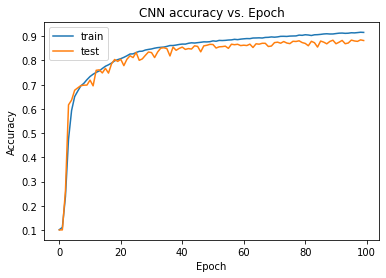

In [ ]:
#Plot accuracy vs epoch

plt.plot(CNN_dropout_hidden_mdata.history['accuracy'])
plt.plot(CNN_dropout_hidden_mdata.history['val_accuracy'])
plt.title('CNN accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='bottom right')
plt.show()

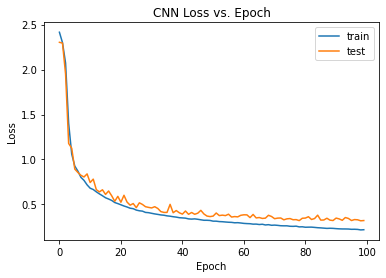

In [ ]:
#Plot loss vs epoch

plt.plot(CNN_dropout_hidden_mdata.history['loss'])
plt.plot(CNN_dropout_hidden_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

# Dropout on Input and Hidden Layers

In [ ]:
num_classes=10
#Create and train model architecture
def CNN_dropout_both():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    # Bild a 2D Convolutional layer with 256 feature maps and a 3x3 filter
    model.add(Conv2D(256 , (3,3), activation = 'sigmoid', input_shape = (28,28,1)))
    
    # Randomly freezes 30% of weights in previous layer to prevent over fitting
    model.add(Dropout(0.3))
    
    # Add a 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides = None, padding = 'valid', data_format = None ))
    
    # Add a 2D Convolutional layer with 
    model.add(Conv2D(128, (3,3), activation = 'sigmoid', input_shape = (13,13,256) ))
    
    # Randomly freezes 30% of weights in previous layer to prevent over fitting
    model.add(Dropout(0.3))

    # Add a 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides = None, padding = 'valid', data_format = None ))
    
    # Flatten data for input into Dense layers
    model.add(Flatten())
    
    # Add Dense layer with 100 perceptrons
    model.add(Dense(100, activation = "relu", kernel_initializer = "normal"))
    
    # Add another Dense layer with 100 perceptrons
    model.add(Dense(100, activation = "relu", kernel_initializer = "normal"))

    #Output layer with num_classes perceptrons
    model.add(Dense(num_classes, activation = "softmax"))
    
    return model


#Create instance of CNN model graph
CNN_dropout_both = CNN_dropout_both()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_dropout_both_mdata = CNN_dropout_both.fit(data_train, labels_train, validation_data = (data_test, labels_test), epochs =100, batch_size = 2048, shuffle = True)

#Print accuracy of model on testing set after training 
scores = CNN_dropout_both.evaluate(data_test, labels_test)

print("Accuracy: %.2f%%" %(scores[1]*100))

Epoch 1/100
30/30 [==============================] - 18s 562ms/step - loss: 2.4296 - accuracy: 0.0992 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 2/100
30/30 [==============================] - 17s 554ms/step - loss: 2.3089 - accuracy: 0.1061 - val_loss: 2.2990 - val_accuracy: 0.1679
Epoch 3/100
30/30 [==============================] - 17s 554ms/step - loss: 2.2256 - accuracy: 0.1764 - val_loss: 2.1600 - val_accuracy: 0.1701
Epoch 4/100
30/30 [==============================] - 17s 554ms/step - loss: 1.6650 - accuracy: 0.4008 - val_loss: 1.4817 - val_accuracy: 0.5426
Epoch 5/100
30/30 [==============================] - 17s 554ms/step - loss: 1.2001 - accuracy: 0.5525 - val_loss: 1.3486 - val_accuracy: 0.5353
Epoch 6/100
30/30 [==============================] - 17s 554ms/step - loss: 1.0295 - accuracy: 0.6076 - val_loss: 1.2671 - val_accuracy: 0.5305
Epoch 7/100
30/30 [==============================] - 17s 554ms/step - loss: 0.9348 - accuracy: 0.6466 - val_loss: 1.1793 - val_accuracy:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


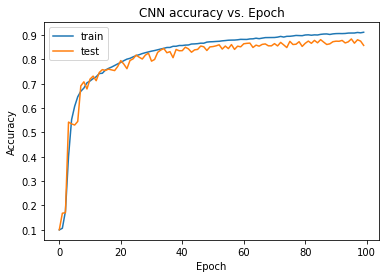

In [ ]:
#Plot accuracy vs epoch

plt.plot(CNN_dropout_both_mdata.history['accuracy'])
plt.plot(CNN_dropout_both_mdata.history['val_accuracy'])
plt.title('CNN accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='bottom right')
plt.show()

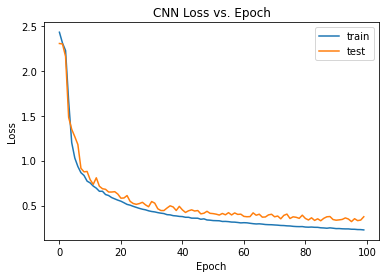

In [ ]:
#Plot loss vs epoch

plt.plot(CNN_dropout_both_mdata.history['loss'])
plt.plot(CNN_dropout_both_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()